In [ ]:
from helper_methods import extract_frame_pairs
from model import build_convlstm_model
from helper_methods import show_frame
import tensorflow as tf
import numpy as np

In [ ]:
dataX, dataY = extract_frame_pairs("horse_data.mp4")

In [ ]:
model = build_convlstm_model(1, 64, 64, 1)


c:\Users\brian\anaconda3\envs\tfclean\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
X_reshape = tf.expand_dims(dataX,axis=1)
Y_reshape = tf.expand_dims(dataY,axis=1)

(355, 1, 64, 64, 1)
(355, 1, 64, 64, 1)


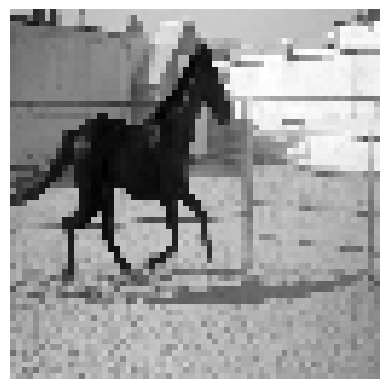

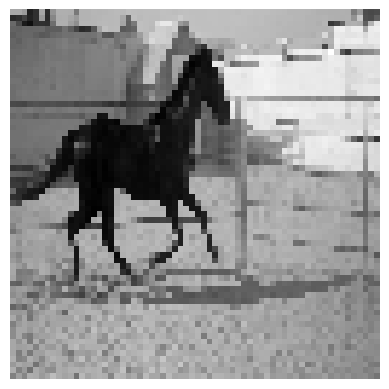

In [ ]:
print(X_reshape.shape)
print(Y_reshape.shape)
show_frame(dataX[1])
show_frame(dataY[1])

In [6]:
model.fit(X_reshape,Y_reshape)

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 629ms/step - loss: 0.0561


In [9]:
test = model.predict(X_reshape[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


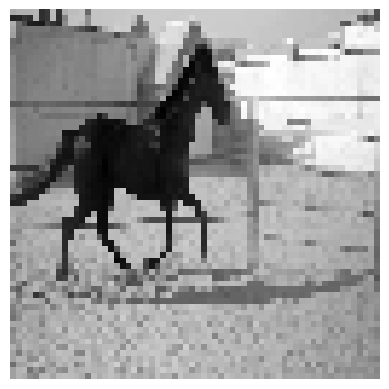

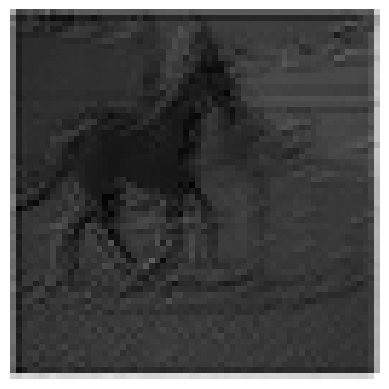

In [ ]:
show_frame(np.reshape(X_reshape[0:1],(64,64,1)))
show_frame(test[0])